In [2]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
df.shape

(1000, 9)

In [8]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [9]:
df.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


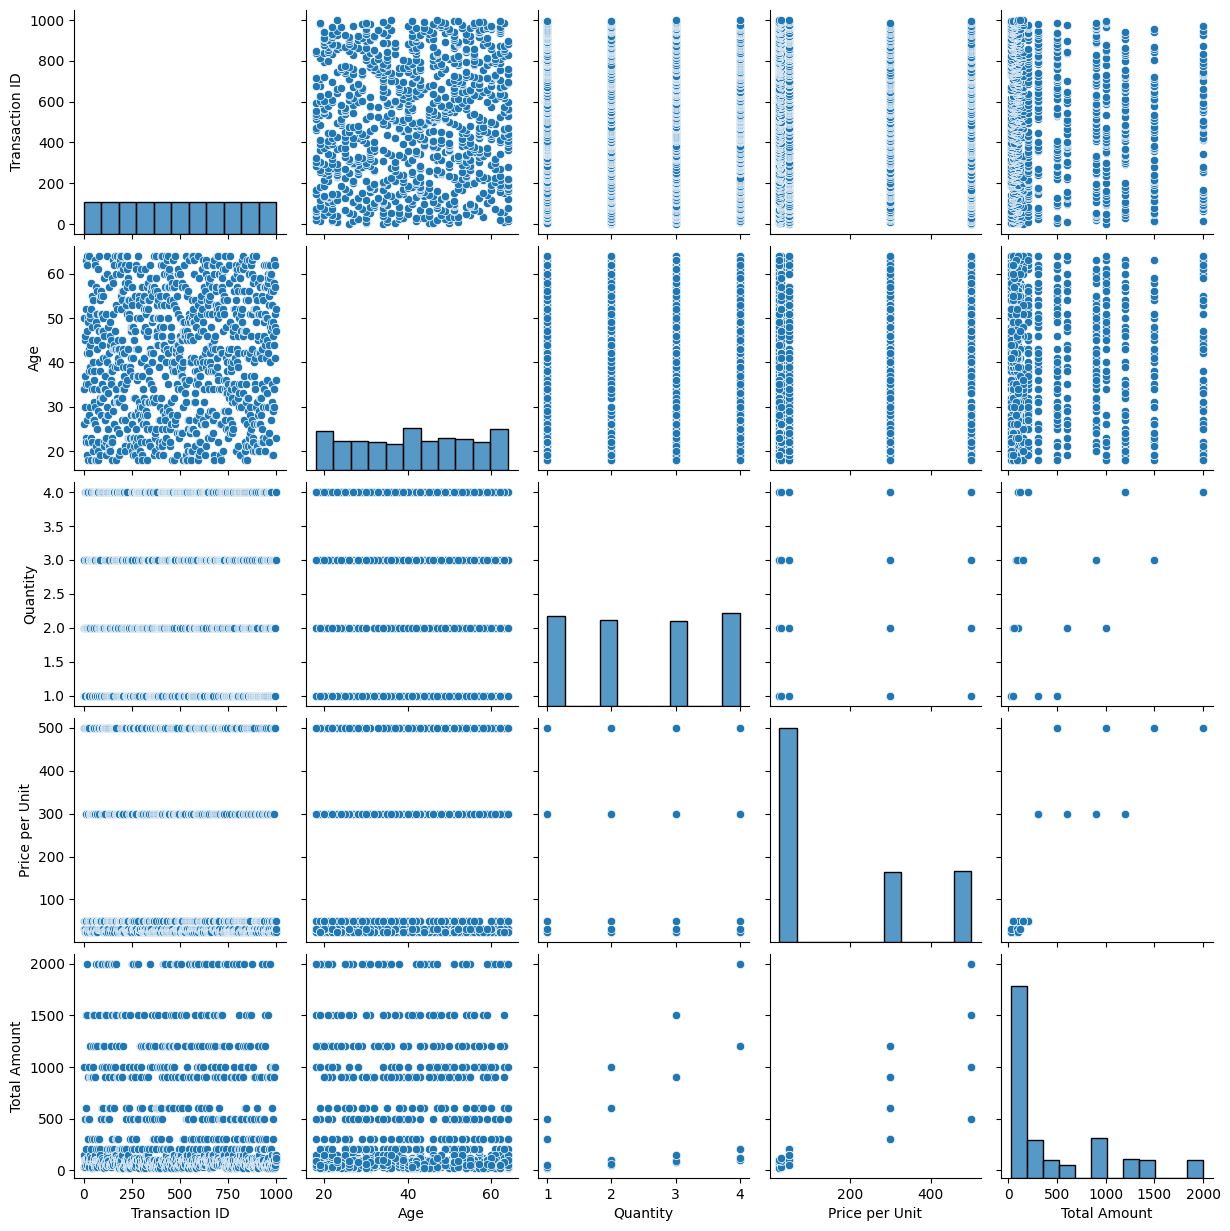

In [10]:
sns.pairplot(df)

In [11]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


/tmp/ipython-input-1454753252.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Product Category'],palette='pastel')


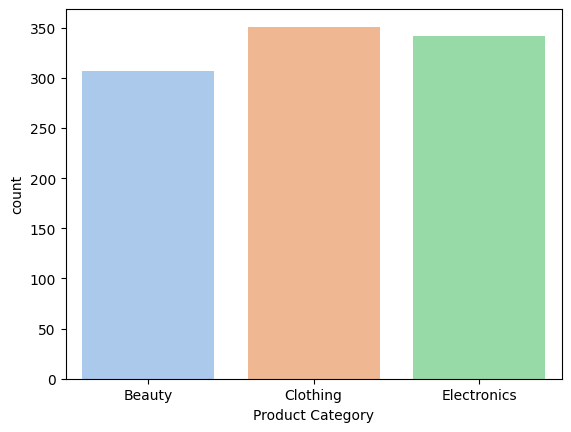

In [12]:
sns.countplot(x=df['Product Category'],palette='pastel')
plt.show()

In [13]:
df.groupby(['Product Category', 'Gender'])[['Quantity','Total Amount']].sum()

Quantity  Total Amount
Product Category Gender                        
Beauty           Female       418         74830
                 Male         353         68685
Clothing         Female       441         81275
                 Male         453         74305
Electronics      Female       439         76735
                 Male         410         80170

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Month']

,Month
0,November
1,February
2,January
3,May
4,May
...,...
995,May
996,November
997,October
998,December


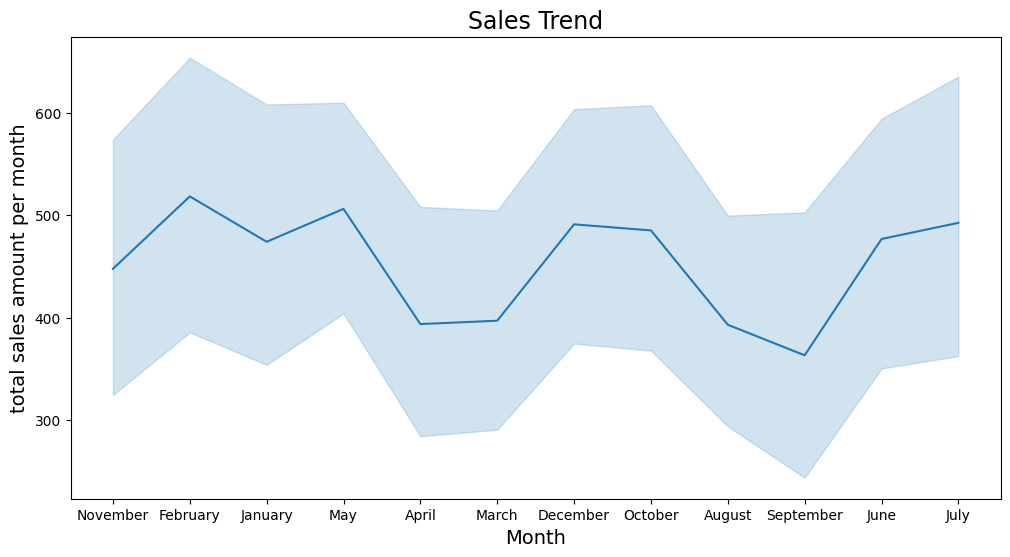

In [15]:
#Sales trend
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='Total Amount',data= df)
plt.title('Sales Trend',fontsize=17)
plt.xlabel('Month',fontsize=14)
plt.ylabel('total sales amount per month',fontsize=14)
plt.show()

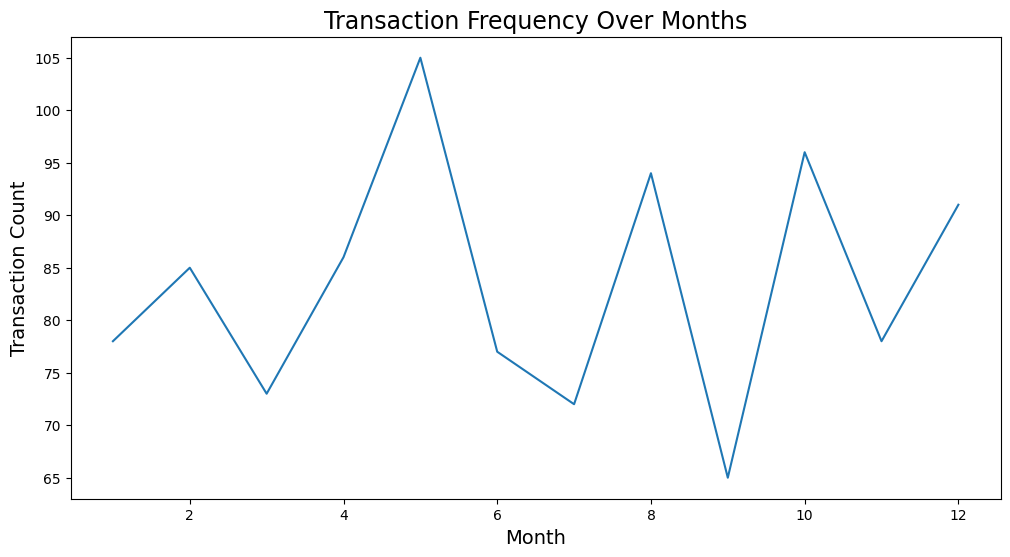

In [16]:
df['Month'] = df['Date'].dt.month
transaction_count = df.groupby('Month')['Transaction ID'].count()
plt.figure(figsize=(12,6))
sns.lineplot(x=transaction_count.index,y=transaction_count.values)
plt.title('Transaction Frequency Over Months',fontsize=17)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Transaction Count',fontsize=14)
plt.show()

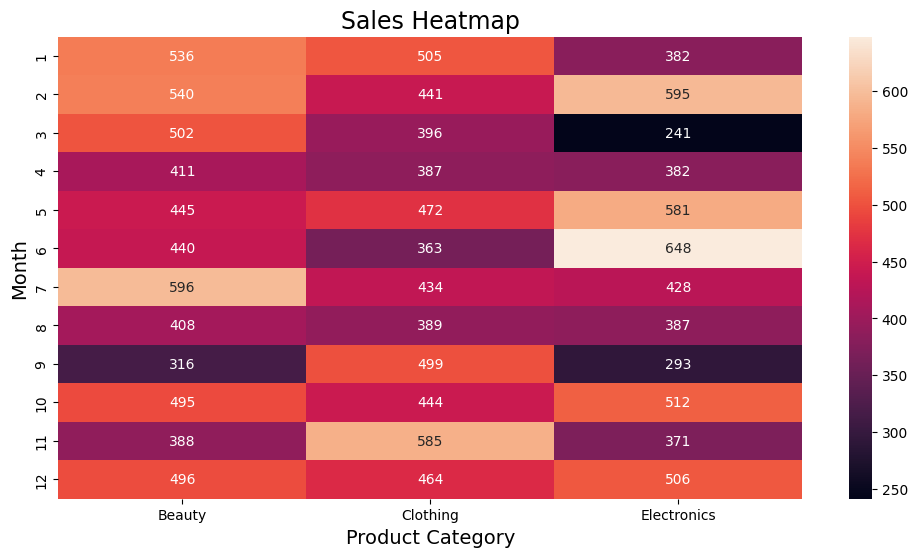

In [18]:
heatmap = df.pivot_table(index='Month',columns='Product Category',values='Total Amount')
plt.figure(figsize=(12,6))
sns.heatmap(heatmap,annot=True,fmt='.0f')
plt.title('Sales Heatmap',fontsize=17)
plt.xlabel('Product Category',fontsize=14)
plt.ylabel('Month',fontsize=14)
plt.show()

In [19]:
df['Age'].count()

np.int64(1000)

In [21]:
df['Gender'].value_counts()

,count
Gender,
Female,510
Male,490


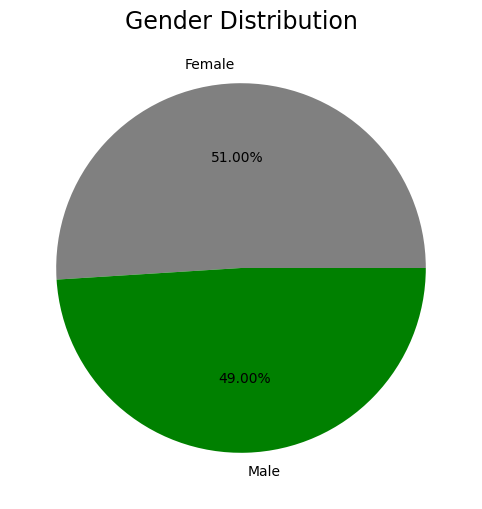

In [24]:
plt.figure(figsize=(12,6))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.2f%%',colors=['grey','green'])
plt.title('Gender Distribution',fontsize=17)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

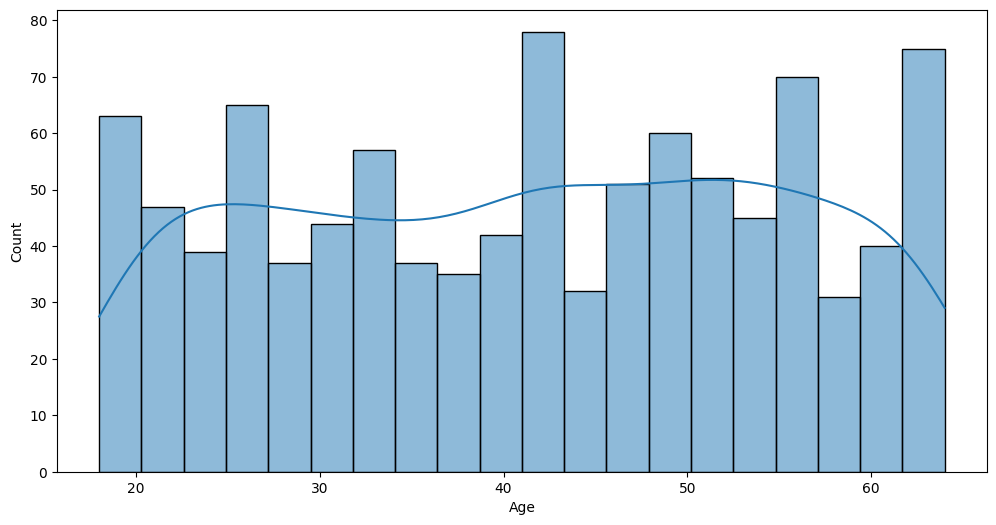

In [25]:
#histograms
plt.figure(figsize=(12,6))
sns.histplot(df['Age'],bins=20,kde=True)

In [26]:
df.dtypes

,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64
Month,int32


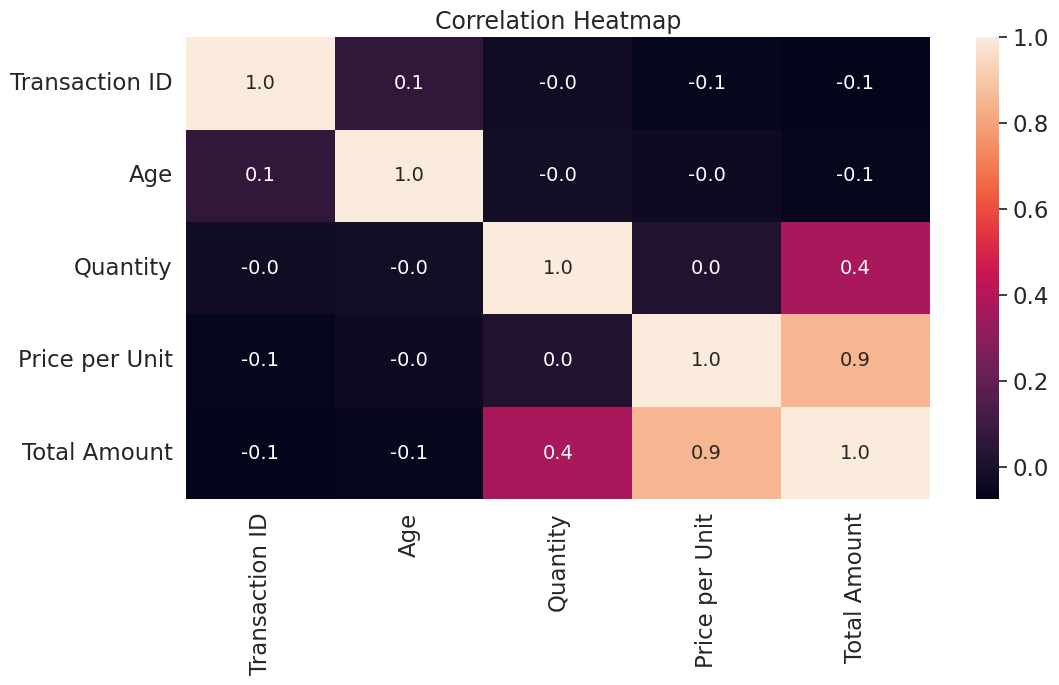

In [32]:
#correlation
correlation = df[df.dtypes[df.dtypes == 'int64'].index].corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(12,6))
ax = sns.heatmap(correlation,annot=True,annot_kws={'size': 14},fmt='.1f')
plt.title('Correlation Heatmap',fontsize=17)
plt.show()
